In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
input_path = "../data/features_encoded.csv"
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")

In [4]:
labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

In [5]:
train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [6]:
scaler = StandardScaler()
normalizedTrainFeatures = scaler.fit_transform(train_features)
normalizedTestFeatures = scaler.transform(test_features)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.

In [7]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=100)
minibatch_kmeans.fit(normalizedTrainFeatures)

MiniBatchKMeans(batch_size=100, n_clusters=2, random_state=0)

In [8]:
train_cluster_labels = minibatch_kmeans.predict(normalizedTrainFeatures)
test_cluster_labels = minibatch_kmeans.predict(normalizedTestFeatures)

In [9]:
print("Inertia:", minibatch_kmeans.inertia_)

Inertia: 977541.4313342336


In [10]:
if normalizedTrainFeatures.shape[1] in [2, 3]:
    plt.scatter(normalizedTrainFeatures[:, 0], normalizedTrainFeatures[:, 1], c=train_cluster_labels, cmap='viridis')
    centers = minibatch_kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title("MiniBatch KMeans Clustering Visualization")
    plt.show()

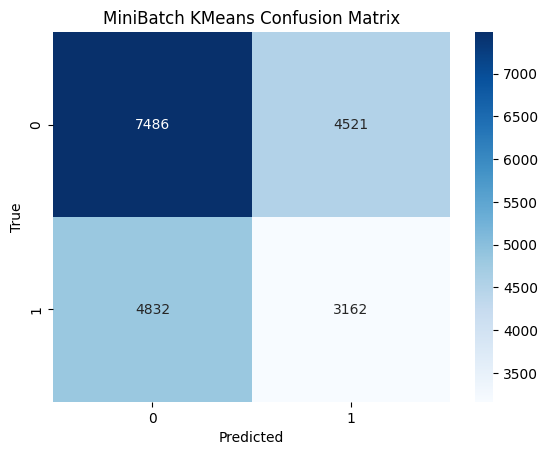

In [11]:
cm = confusion_matrix(test_labels, test_cluster_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MiniBatch KMeans Confusion Matrix')
plt.show()